## An example of a binary classification neural network using Keras for backpropagation:
- In this example, we use the make_classification function from scikit-learn to generate synthetic binary classification data. The neural network architecture has an input layer with 20 neurons (since we have 20 features), a hidden layer with 16 neurons and ReLU activation, and an output layer with a single neuron and sigmoid activation for binary classification.

In [1]:
# Import necessary libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# Generate synthetic data for binary classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_clusters_per_class=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Model 

- The model.compile line specifies 'adam' as the optimization algorithm, 'binary_crossentropy' as the loss function (suitable for binary classification), and 'accuracy' as the metric to monitor during training.

- The model.fit line is where the backpropagation takes place. The model is trained on the training data for a specified number of epochs.

In [2]:

# Build a binary classification neural network
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=20))  # Input layer with 20 features
model.add(Dense(units=1, activation='sigmoid'))  # Output layer with a single neuron (binary classification)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model (backpropagation happens here)
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Make predictions on new data
sample_data = np.random.randn(5, 20)  # Random 5 samples with 20 features
predictions = model.predict(sample_data)
print("Predictions:")
print(predictions)


Epoch 1/10
20/20 [==============================] - 0s 7ms/step - loss: 0.6381 - accuracy: 0.6219 - val_loss: 0.6127 - val_accuracy: 0.6625
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 0.5859 - accuracy: 0.6938 - val_loss: 0.5795 - val_accuracy: 0.7188
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 0.5462 - accuracy: 0.7563 - val_loss: 0.5496 - val_accuracy: 0.7500
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: 0.5121 - accuracy: 0.8047 - val_loss: 0.5244 - val_accuracy: 0.7875
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.4829 - accuracy: 0.8266 - val_loss: 0.4991 - val_accuracy: 0.7875
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4560 - accuracy: 0.8391 - val_loss: 0.4758 - val_accuracy: 0.8188
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 0.4318 - accuracy: 0.8500 - val_loss: 0.4540 - val_accuracy: 0.8188
Epoch 8/10
20/20 [==

### Multi Classification example using Backpropagation using Keras

### Let us understand irsis data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame for the features
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [5]:

# Add the target column to the DataFrame
iris_df['target'] = iris.target

# Display the first few rows of the DataFrame
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# Display descriptive statistics for the features
print("\nDescriptive Statistics for Features:")
iris_df.describe()


Descriptive Statistics for Features:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:

# Display the count of each class in the target column
print("\nCount of Each Class in Target:")
print(iris_df['target'].value_counts())


Count of Each Class in Target:
0    50
1    50
2    50
Name: target, dtype: int64


<Figure size 864x432 with 0 Axes>

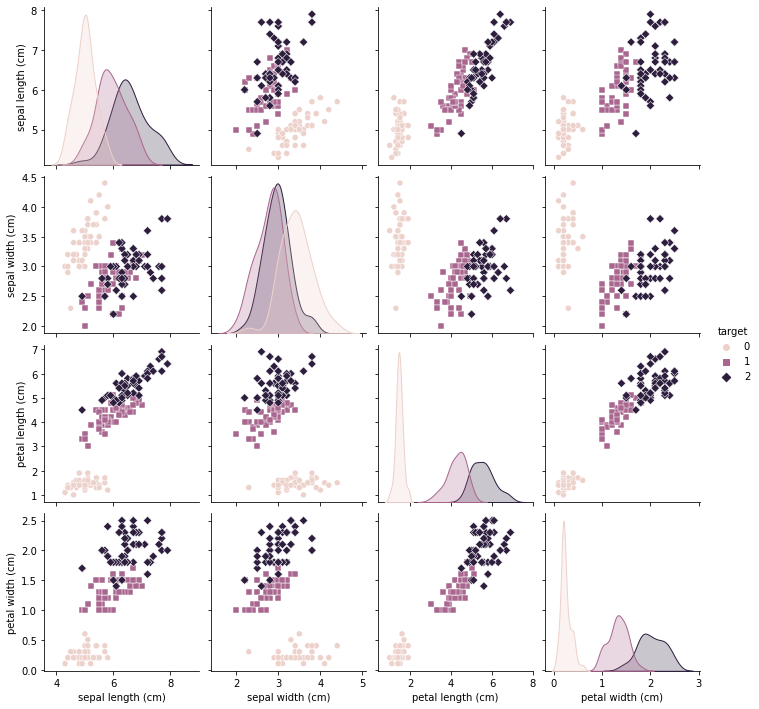

In [8]:

# Visualizations
plt.figure(figsize=(12, 6))

# Pairplot for feature distribution and relationships
sns.pairplot(iris_df, hue='target', markers=["o", "s", "D"])


##  Multi Classification example using Backpropagation using Keras

-  we are using the Iris dataset, a well-known dataset for multi-class classification. The neural network architecture has an input layer with 4 neurons (since the Iris dataset has 4 features), and an output layer with 3 neurons (one for each class) using softmax activation for multi-class classification.

In [9]:
# Import necessary libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load the Iris dataset (a popular multi-class classification dataset)
iris = load_iris()
X, y = iris.data, iris.target

In [10]:
# Convert labels to one-hot encoding
y_one_hot = to_categorical(y, num_classes=3)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:

# Build a multi-class classification neural network
species_model = Sequential()
species_model.add(Dense(units=16, activation='relu', input_dim=4))  # Input layer with 4 features (Iris dataset has 4 features)
species_model.add(Dense(units=3, activation='softmax'))  # Output layer with 3 neurons (one for each class) and softmax activation

In [14]:

# Compile the model
species_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model (backpropagation happens here)
species_model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)


Epoch 1/50
10/10 [==============================] - 0s 14ms/step - loss: 1.2379 - accuracy: 0.2500 - val_loss: 1.1222 - val_accuracy: 0.2083
Epoch 2/50
10/10 [==============================] - 0s 4ms/step - loss: 1.1869 - accuracy: 0.2500 - val_loss: 1.0711 - val_accuracy: 0.2500
Epoch 3/50
10/10 [==============================] - 0s 4ms/step - loss: 1.1427 - accuracy: 0.2500 - val_loss: 1.0221 - val_accuracy: 0.2500
Epoch 4/50
10/10 [==============================] - 0s 5ms/step - loss: 1.1007 - accuracy: 0.2708 - val_loss: 0.9831 - val_accuracy: 0.3333
Epoch 5/50
10/10 [==============================] - 0s 4ms/step - loss: 1.0638 - accuracy: 0.3438 - val_loss: 0.9443 - val_accuracy: 0.5000
Epoch 6/50
10/10 [==============================] - 0s 5ms/step - loss: 1.0294 - accuracy: 0.3750 - val_loss: 0.9104 - val_accuracy: 0.5833
Epoch 7/50
10/10 [==============================] - 0s 5ms/step - loss: 0.9985 - accuracy: 0.3750 - val_loss: 0.8774 - val_accuracy: 0.6667
Epoch 8/50
10/10 [=

In [15]:

# Evaluate the model on the test set
loss, accuracy = species_model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

1/1 [==============================] - 0s 21ms/step - loss: 0.2724 - accuracy: 0.9667
Test Loss: 0.2724, Test Accuracy: 0.9667


In [18]:

# Make predictions on new data
sample_data = np.random.randn(4, 4)  # Random 5 samples with 4 features
predictions = species_model.predict(sample_data)
print("Predictions:")
print(predictions)


1/1 [==============================] - 0s 16ms/step
Predictions:
[[0.4744252  0.36803943 0.15753537]
 [0.03827874 0.78655976 0.1751615 ]
 [0.26816195 0.5401332  0.19170485]
 [0.07509188 0.4688139  0.4560942 ]]


##  we use a neural network with one hidden layer and visualize the activations of the neurons in the first hidden layer. The idea is that neurons with higher activations for certain features might be indicative of important features.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# Activation visualization for important features
def visualize_activations(data, layer_index):
    from keras.models import Model

    intermediate_layer_model = Model(inputs=model.input,
                                     outputs=model.layers[layer_index].output)
    
    activations = intermediate_layer_model.predict(data)

    plt.figure(figsize=(12, 6))
    for i in range(activations.shape[1]):
        plt.subplot(2, 8, i + 1)
        plt.hist(activations[:, i], bins=20, color='blue', alpha=0.7)
        plt.title(f'Activation {i}')
        plt.tight_layout()

    plt.show()

1/1 [==============================] - 0s 42ms/step


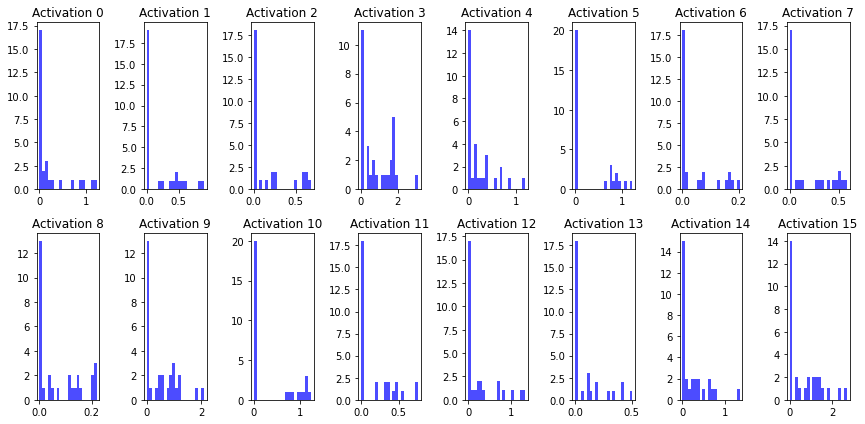

In [21]:
visualize_activations(X_test, layer_index=0)